In [86]:
import os
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [87]:
data_139prova = pd.read_csv('../../data/group15/139_Run000260_000000.txt')
data_139prova['X'] = data_139prova['DRIFT_TIME']*42/(2*390)

In [91]:
def event_plot(event):
    
    fig,ax1 = plt.subplots(figsize=(1.5*4.2*17,1.5*1.3*6))
    
    #dimensions of cells
    dx=42
    dy=13
    
    x = []
    y = []
    for i in range(len(event)):
        hit = event.iloc[i]
        y1 = dy * (4 - hit.LAYER + 1/2)
        y.append(y1)
        y.append(y1)
        if hit.LAYER%2 == 0:
            x1 = dx * (hit.COLUMN - 1/2) + hit.X 
            x2 = dx * (hit.COLUMN - 1/2) - hit.X 
            x.append(x1)
            x.append(x2)
        else:
            x1 = dx * hit.COLUMN + hit.X 
            x2 = dx * hit.COLUMN - hit.X 
            x.append(x1)
            x.append(x2)
            

    #draw the detector
    ax1.set_xlim(0,42*16 + 42)
    ax1.set_ylim(-13,13*4 + 13)


    #coordinates of layer 4
    x_1=np.arange(1,17)*42-dx
    y_1=0
    
    #coordinates of layer 3
    x_2=x_1+dx/2
    y_2=dy
    
    #coordinates of layer 2
    x_3=x_1
    y_3=2*dy
    
    #coordinates of layer 1
    x_4=x_2
    y_4=3*dy
    
    for i in range(16):
        rect = patches.Rectangle((x_1[i],y_1),dx,dy,linewidth=10,edgecolor='black',facecolor='none')
        ax1.add_patch(rect)
    
        rect = patches.Rectangle((x_2[i],y_2),dx,dy,linewidth=10,edgecolor='black',facecolor='none')
        ax1.add_patch(rect)
    
        rect = patches.Rectangle((x_3[i],y_3),dx,dy,linewidth=10,edgecolor='black',facecolor='none')
        ax1.add_patch(rect)
        
        rect = patches.Rectangle((x_4[i],y_4),dx,dy,linewidth=10,edgecolor='black',facecolor='none')
        ax1.add_patch(rect)
        
        ax1.axis('off')
        
    ax1.scatter(x,y, marker = 'x', c = 'red', s = 500, linewidth = 7)
    return ax1

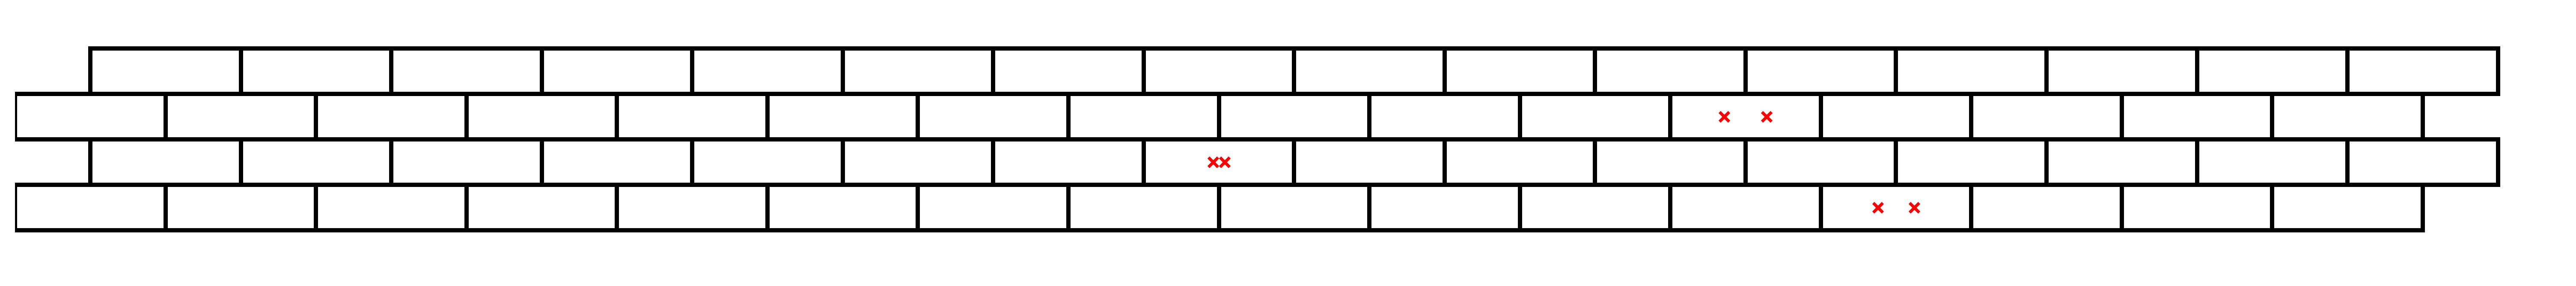

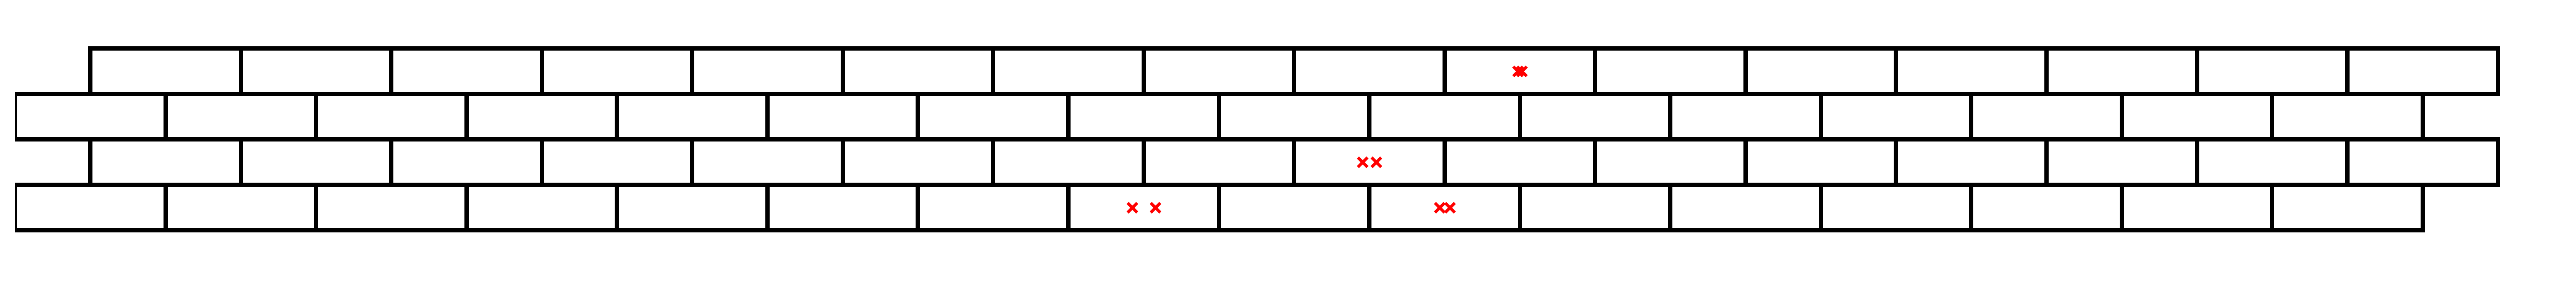

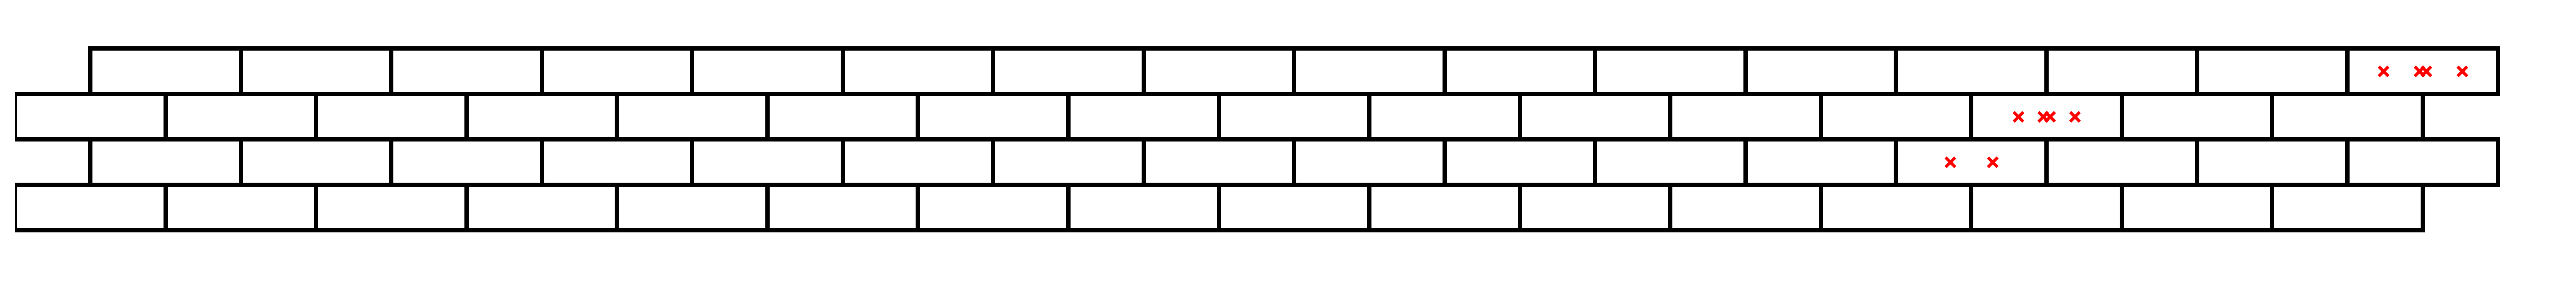

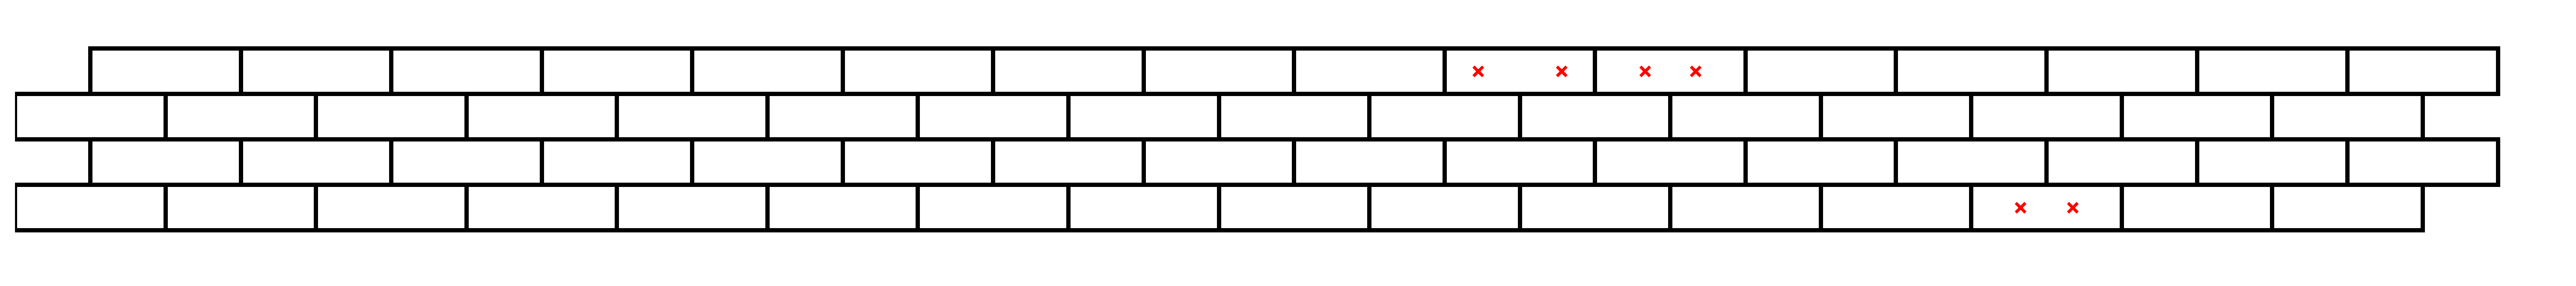

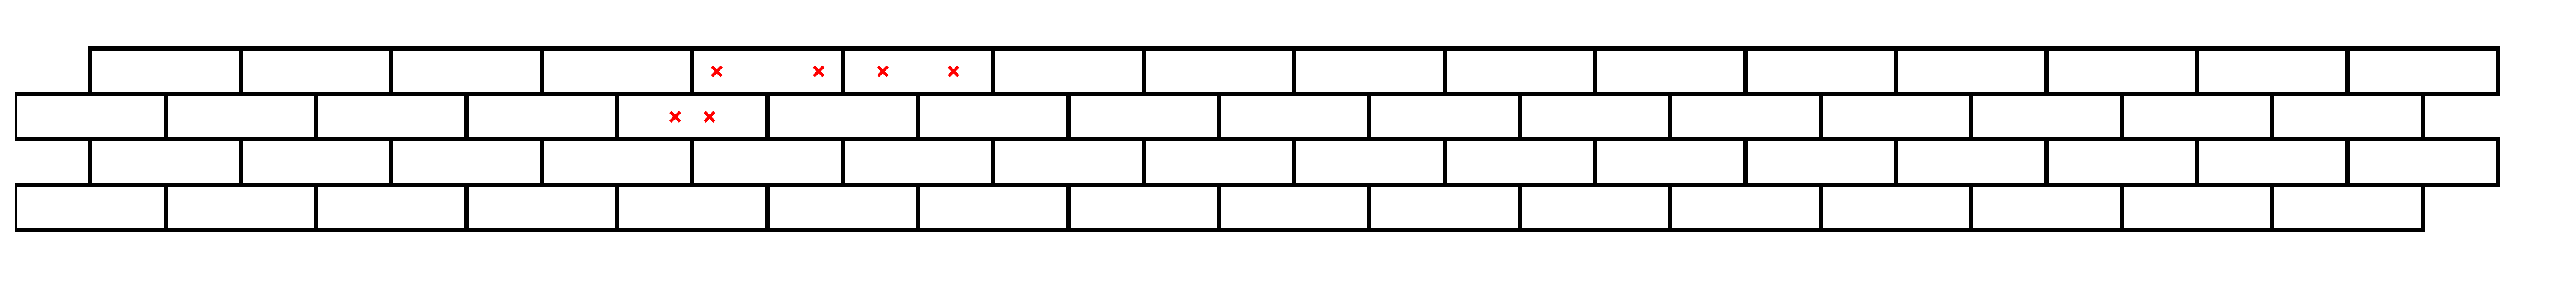

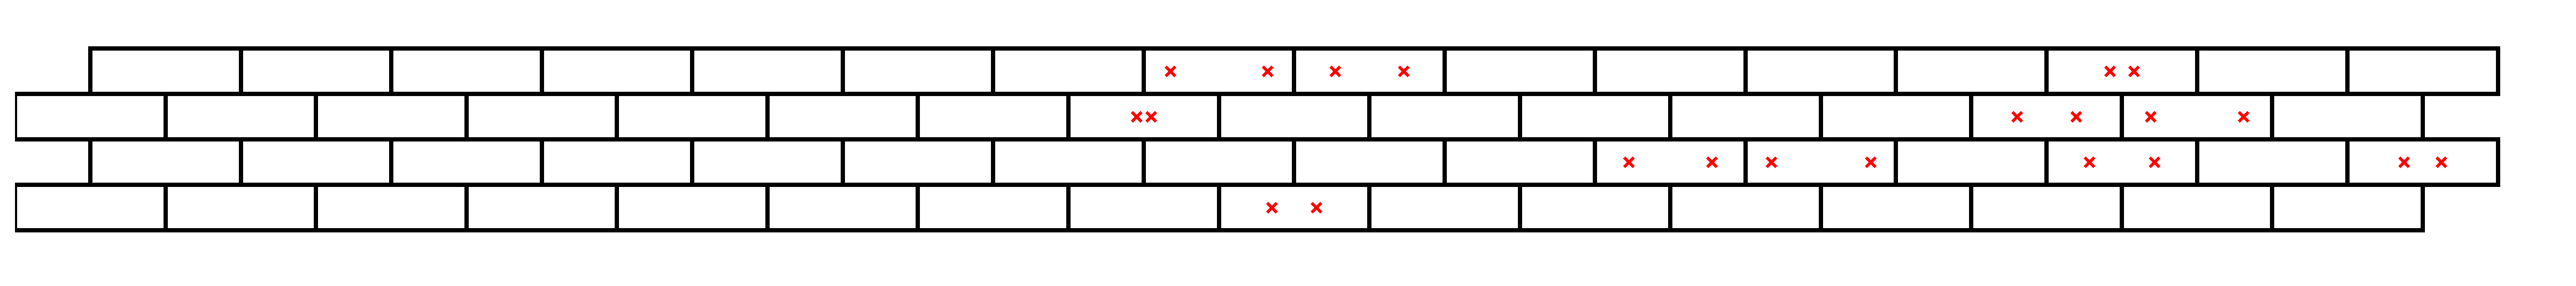

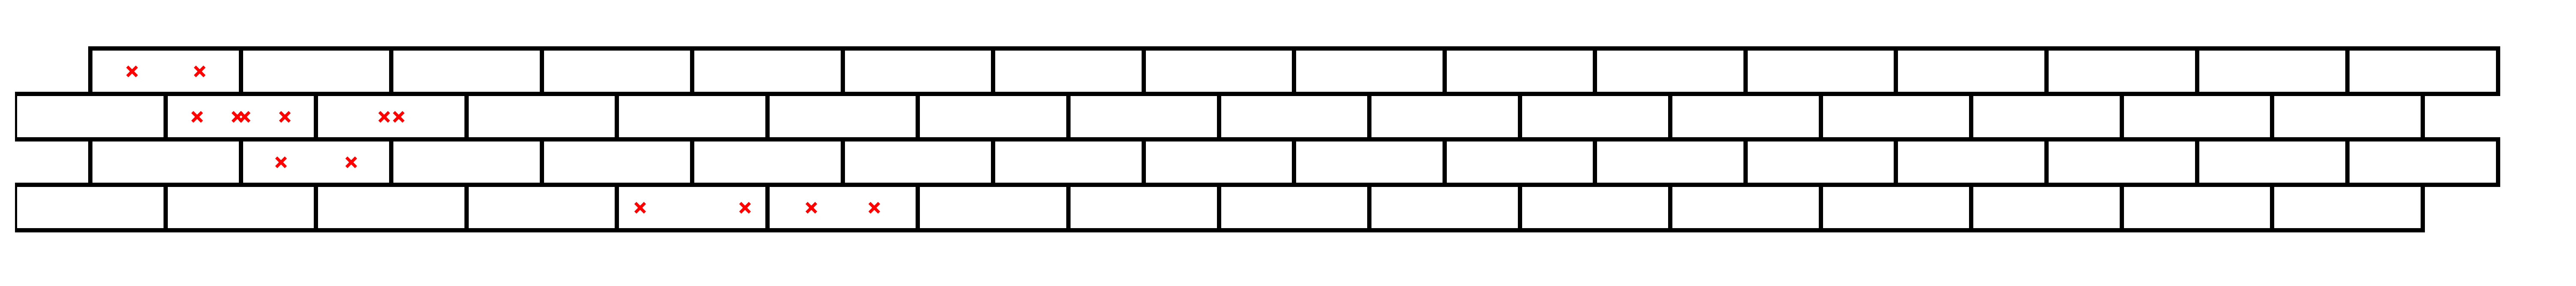

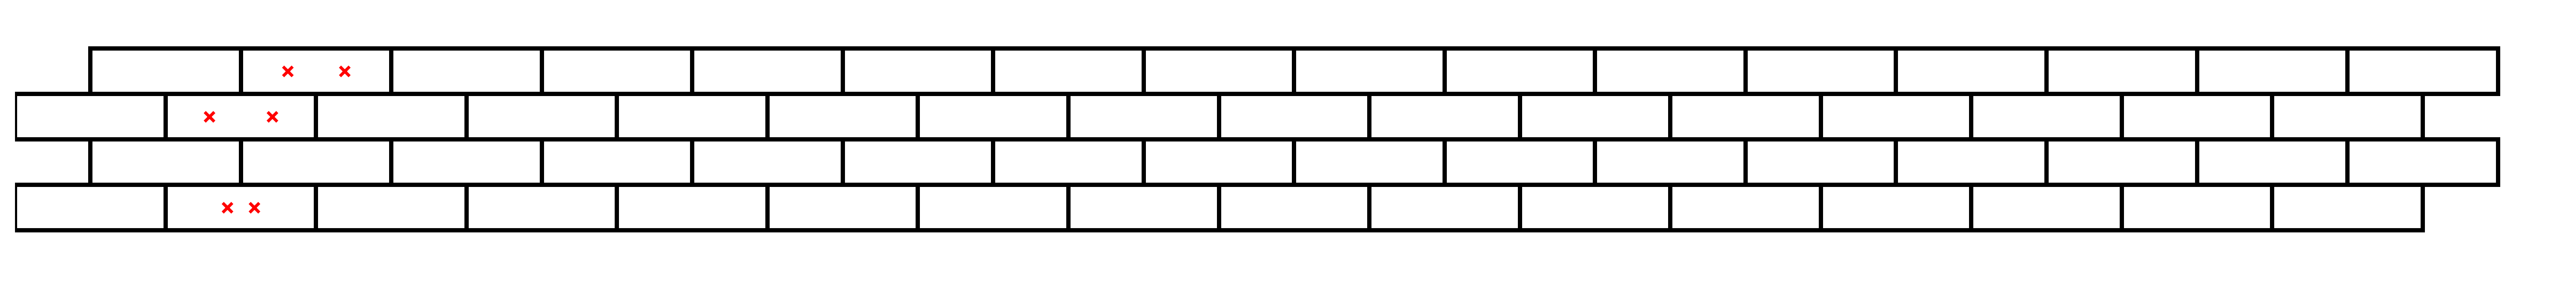

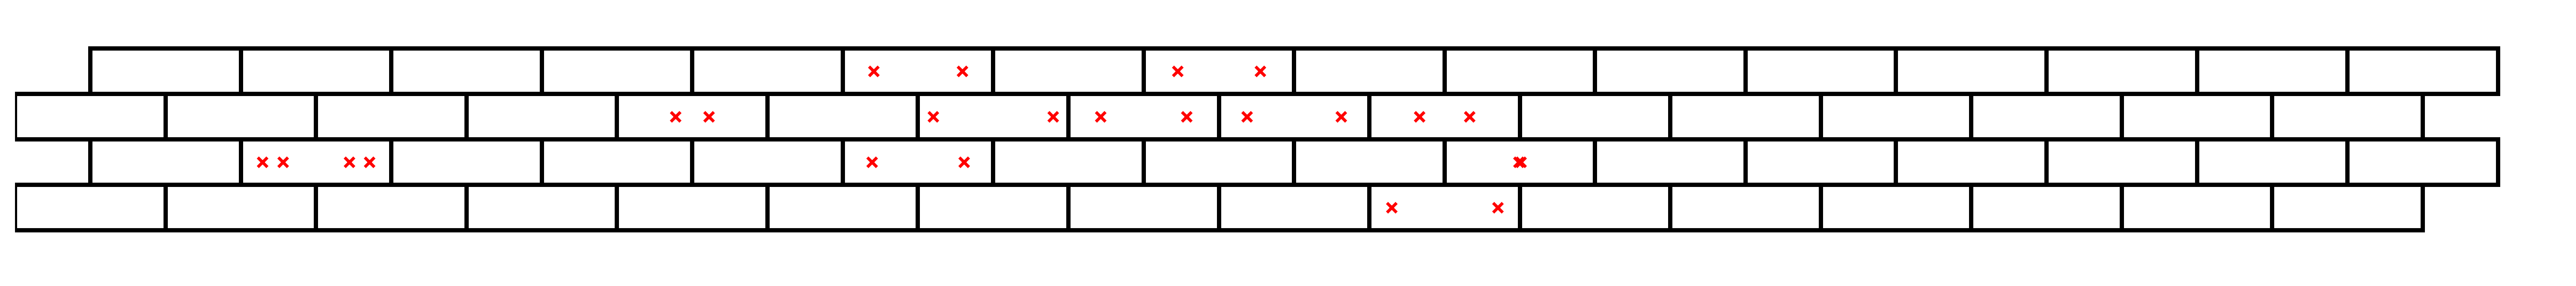

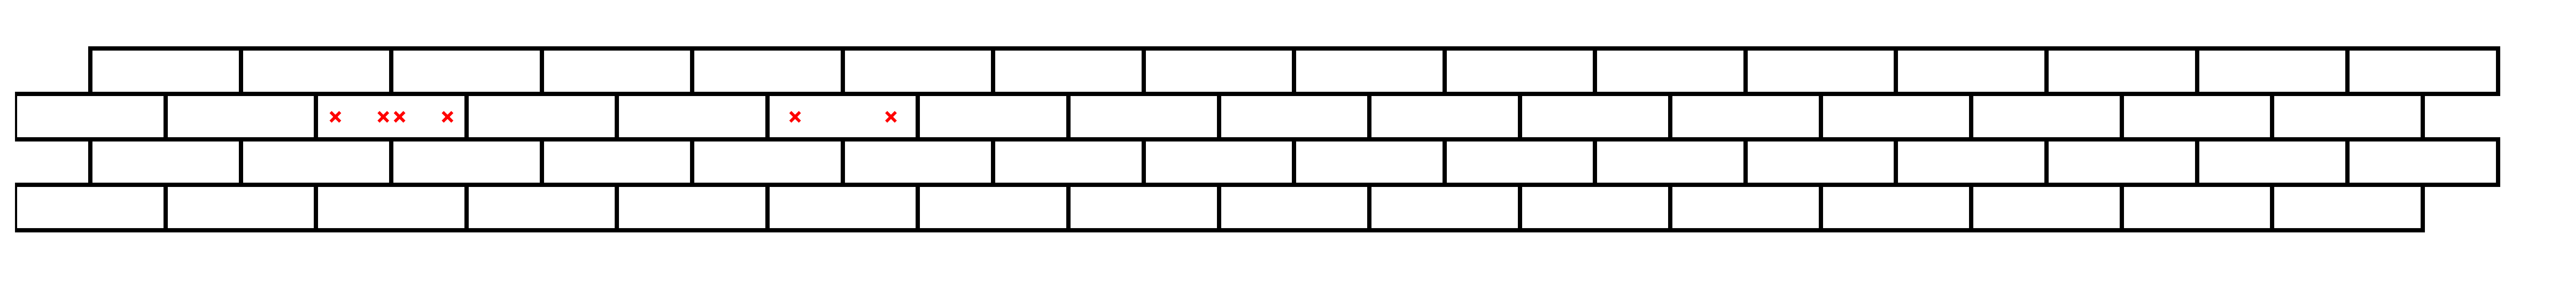

In [101]:
for i in np.unique(data_139prova.ORBIT_CNT.values)[:10]:
    try:
        event = data_139prova.groupby(['ORBIT_CNT','EVENT']).get_group((i,1))
        event_plot(event)
    except:
        event = data_139prova.groupby(['ORBIT_CNT']).get_group(i)
        event_plot(event)

In [103]:
for i in np.unique(data_139prova.ORBIT_CNT.values)[:10]:
        event = data_139prova.groupby('ORBIT_CNT').get_group(i)
        print(event)

    ORBIT_CNT             t  DETECTOR  LAYER  COLUMN  EVENT  DRIFT_TIME  \
0  1897417046  36780.833333         4      3       8      1   30.833333   
1  1897417046  36860.000000         4      2      12      1  110.000000   
2  1897417046  36845.000000         4      4      13      1   95.000000   

          X  
0  1.660256  
1  5.923077  
2  5.115385  
    ORBIT_CNT            t  DETECTOR  LAYER  COLUMN  EVENT  DRIFT_TIME  \
3  1897418311  1235.000000         4      4       8      1   60.000000   
4  1897418311  1184.166667         4      1      10      1    9.166667   
5  1897418311  1201.666667         4      4      10      1   26.666667   
6  1897418311  1210.833333         4      3       9      1   35.833333   

          X  
3  3.230769  
4  0.493590  
5  1.435897  
6  1.929487  
     ORBIT_CNT             t  DETECTOR  LAYER  COLUMN  EVENT  DRIFT_TIME  \
7   1897431396  15317.500000         3      1      16      1   17.500000   
8   1897431396  15410.000000         3      3     